In [2]:
import yfinance as yf
import pandas as pd

#getting data from yfinance
data = yf.download('EURUSD=X', start='2023-08-01', end='2024-08-01')
close = data['Close']

#DataFrame
df = pd.DataFrame(close)
df.reset_index(inplace=True)
print(df)

[*********************100%%**********************]  1 of 1 completed

          Date     Close
0   2023-08-01  1.099759
1   2023-08-02  1.100788
2   2023-08-03  1.094415
3   2023-08-04  1.095158
4   2023-08-07  1.100267
..         ...       ...
256 2024-07-25  1.083952
257 2024-07-26  1.085128
258 2024-07-29  1.085376
259 2024-07-30  1.081947
260 2024-07-31  1.081607

[261 rows x 2 columns]


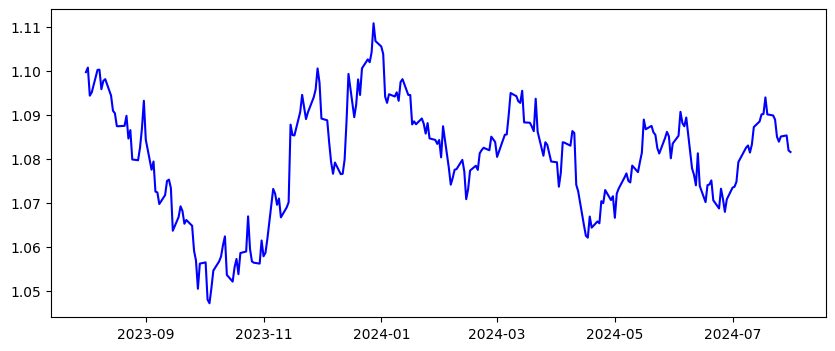

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df['Date'],df['Close'],color = 'blue')


# Split the data in sample and out of sample

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.15, shuffle=False)


# Apply Seasonal trend decomposition aka STL on close prices using statsmodels

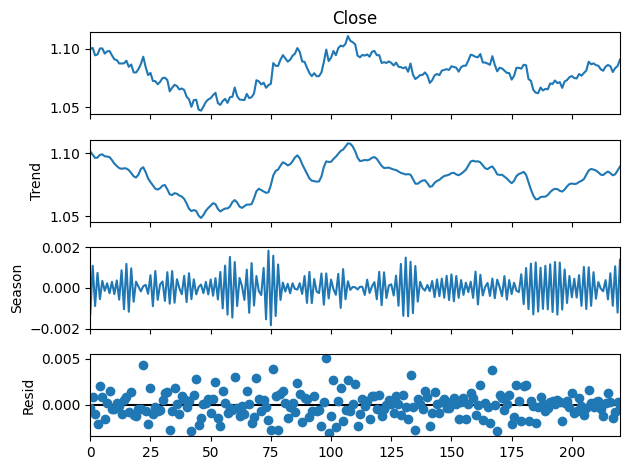

In [5]:
from statsmodels.tsa.seasonal import STL

stl = STL(train['Close'], period=2)
result = stl.fit()

#visualisation
result.plot()
plt.show()

# visualisation of residual as histogram

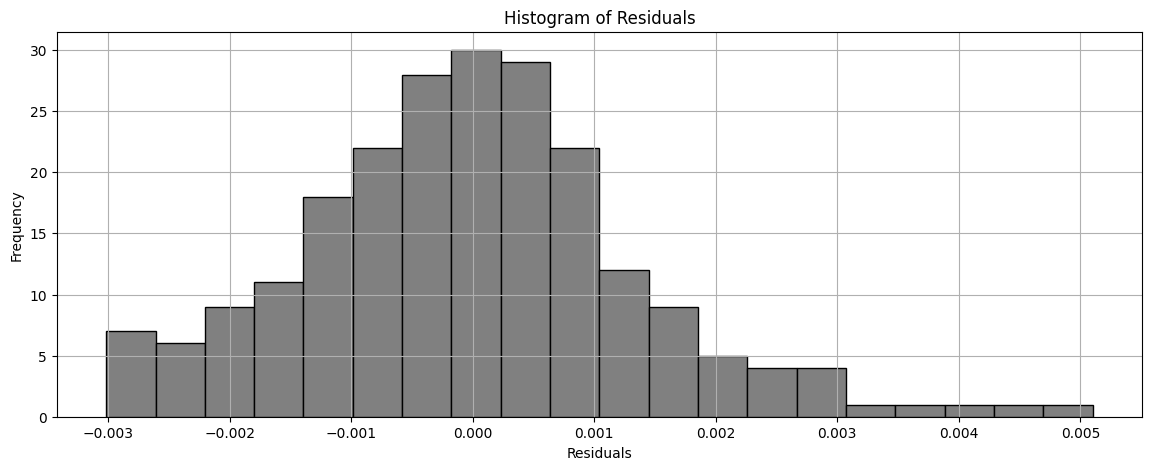

In [6]:
plt.figure(figsize=(14, 5))
plt.hist(result.resid, bins=20 ,color='gray', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

# finding thresholds

when the residual value  is higher than upthreshold so it's a signal of sell,and if it's lower than lowthreshold it's a signal of buy.

In [7]:
rs_mean = result.resid.mean()
rs_std = result.resid.std()
UPthreshold = rs_mean + 2 * rs_std
LOWthreshold = rs_mean - 2 * rs_std

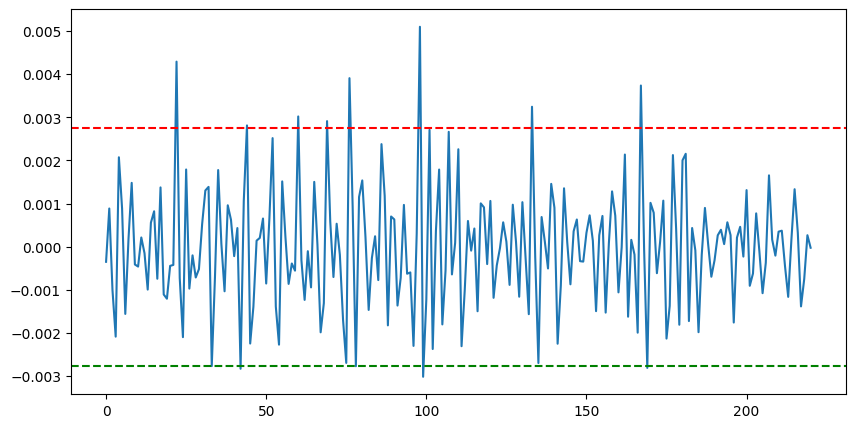

In [13]:
train['buy_signal'] = result.resid > UPthreshold
train['sell_signal'] = result.resid < LOWthreshold
plt.figure(figsize = (10,5))
plt.plot(train.index, result.resid)
plt.axhline(y=UPthreshold, color='red', linestyle='--')
plt.axhline(y=LOWthreshold, color='green', linestyle='--')
